In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **CARREGAMENTO DO DATASET**

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
cnpj_final = pd.read_csv('/content/drive/MyDrive/TCC - PUC/dataset_final.csv',encoding='ISO-8859-1', sep=';' , header=0)

In [6]:
cnpj_final.shape

(10534042, 39)

In [7]:
cnpj_final.dtypes

cnpj_basico                                     int64
cnpj_ordem                                      int64
cnpj_dv                                         int64
matriz_filial                                   int64
capital_social                                float64
capital_social_faixas                           int64
codigo_situacao_cadastral                       int64
data_inicio_atividade                           int64
data_situacao_cadastral                         int64
data_situacao_cadastral_ano_mes                 int64
situacao_cadastral_target                       int64
codigo_ibge                                     int64
codigo_municipio_siafi                          int64
descricao_municipio                            object
regiao                                         object
estado                                         object
interior_metropolitana                          int64
casosAcumulado_covid                          float64
obitosAcumulado_covid       

In [8]:
cnpj_final.head()

,cnpj_basico,cnpj_ordem,cnpj_dv,matriz_filial,capital_social,capital_social_faixas,codigo_situacao_cadastral,data_inicio_atividade,data_situacao_cadastral,data_situacao_cadastral_ano_mes,situacao_cadastral_target,codigo_ibge,codigo_municipio_siafi,descricao_municipio,regiao,estado,interior_metropolitana,casosAcumulado_covid,obitosAcumulado_covid,casos_acumulados_porcentagem_covid,obitos_acumulados_porcentagem_covid,casos_acumulados_porcentagem_covid_faixas,obitos_acumulados_porcentagem_covid_faixas,idh_municipio,idh_educacao,idh_longevidade,idh_renda,idh_municipios_faixas,idh_educacao_municipios_faixas,idh_longevidade_municipios_faixas,idh_renda_municipios_faixas,populacaoTCU2019,pib,pib_per_capita,pib_per_capita_faixas,cnae_principal,cnae_divisao,cnae_secao,cnae_descricao
0,29880797,1,40,1,"3,500.00",1,8,20180308,20200507,202005,1,3170206,5403,UBERLANDIA,Sudeste,MG,0,199.00,9.00,0.03,0.00,0,0,0.79,0.72,0.78,0.89,7,7,7,8,691305,"37,442,790,976.00","54,801.25",7,9511800,95,s,OUTRAS ATIVIDADES DE SERVIÇOS
1,28424384,1,99,1,"3,000.00",1,8,20170815,20200610,202006,1,3304557,6001,RIO DE JANEIRO,Sudeste,RJ,1,"38,960.00","4,716.00",0.58,0.07,5,2,0.80,0.72,0.84,0.84,7,7,8,8,6718903,"364,052,058,232.00","54,426.08",7,8599604,85,p,EDUCAÇÃO
2,29881212,1,7,1,"10,000.00",2,8,20180308,20201214,202012,1,4101200,7421,ANTONINA,Sul,PR,0,"1,038.00",26.00,5.47,0.14,14,3,0.69,0.56,0.69,0.84,6,5,6,8,18980,"538,253,205.00","28,312.72",4,4744099,47,g,COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E ...
3,29881383,1,36,1,"5,000.00",1,8,20180308,20210514,202105,1,3510500,6311,CARAGUATATUBA,Sudeste,SP,0,"13,239.00",354.00,10.89,0.29,18,7,0.76,0.70,0.73,0.84,7,7,7,8,121532,"3,325,920,049.00","27,802.88",4,1091102,10,c,INDÚSTRIAS DE TRANSFORMAÇÃO
4,29881861,1,8,1,"100,000.00",6,8,20180308,20200921,202009,1,4314902,8801,PORTO ALEGRE,Sul,RS,1,"24,446.00",926.00,1.65,0.06,7,2,0.81,0.70,0.87,0.86,8,7,8,8,1483771,"77,134,613,181.00","52,149.66",7,8630504,86,q,SAÚDE HUMANA E SERVIÇOS SOCIAIS


# **EXPLORAÇÃO VISUAL DOS DADOS**

## **Criar Tabelas para Pesquisa**


*   cnpj_final_abertas_total - TABELA COM TODAS AS EMPRESAS ABERTAS NO PERÍODO DE 28 MESES
*   cnpj_final_fechadas_total - TABELA COM TODAS AS EMPRESAS FECHADAS NO PERÍODO DE 28 MESES


---------
---------



*   cnpj_final_fechadas_com_covid - TABELA COM TODAS AS EMPRESAS QUE FECHARAM DURANTE O PERÍODO DE 14 MESES DE COVID - 01/04/2020 a 31/05/2021
*   cnpj_final_fechadas_sem_covid - TABELA COM TODAS AS EMPRESAS QUE FECHARAM DURANTE O PERÍODO DE 14 MESES SEM COVID - 01/02/2019 a 31/03/2020
*   cnpj_final_abertas_com_covid - TABELA COM TODAS AS EMPRESAS QUE ABRIRAM DURANTE O PERÍODO DE 14 MESES DE COVID - 01/04/2020 a 31/05/2021
*   cnpj_final_abertas_sem_covid - TABELA COM TODAS AS EMPRESAS QUE ABRIRAM DURANTE O PERÍODO DE 14 MESES SEM COVID - 01/02/2019 a 31/03/2020

In [9]:
cnpj_final_abertas_total = cnpj_final.query( 'codigo_situacao_cadastral== 2 ')
cnpj_final_fechadas_total = cnpj_final.query( 'codigo_situacao_cadastral== 8 ')

In [10]:
cnpj_final_fechadas_com_covid = cnpj_final_fechadas_total.query('data_situacao_cadastral >= 20200401 and data_situacao_cadastral <= 20210531 ')
cnpj_final_fechadas_sem_covid = cnpj_final_fechadas_total.query('data_situacao_cadastral >= 20190201 and data_situacao_cadastral <= 20200331 ')
cnpj_final_abertas_com_covid = cnpj_final_abertas_total.query('data_situacao_cadastral >= 20200401 and data_situacao_cadastral <= 20210531 ')
cnpj_final_abertas_sem_covid = cnpj_final_abertas_total.query('data_situacao_cadastral >= 20190201 and data_situacao_cadastral <= 20200331 ')

## **Análise do Fechamento e Abertura de Empresas ao longo dos 28 meses**

In [11]:
cnpj_final_abertas_total_graf_data = cnpj_final_abertas_total.groupby('data_situacao_cadastral_ano_mes')['data_situacao_cadastral_ano_mes'].count()
cnpj_final_fechadas_total_graf_data = cnpj_final_fechadas_total.groupby('data_situacao_cadastral_ano_mes')['data_situacao_cadastral_ano_mes'].count()

In [12]:
barWidth =  0.25
r1 = np.arange(len(cnpj_final_abertas_total_graf_data))
r2 = [x+barWidth for x in r1]

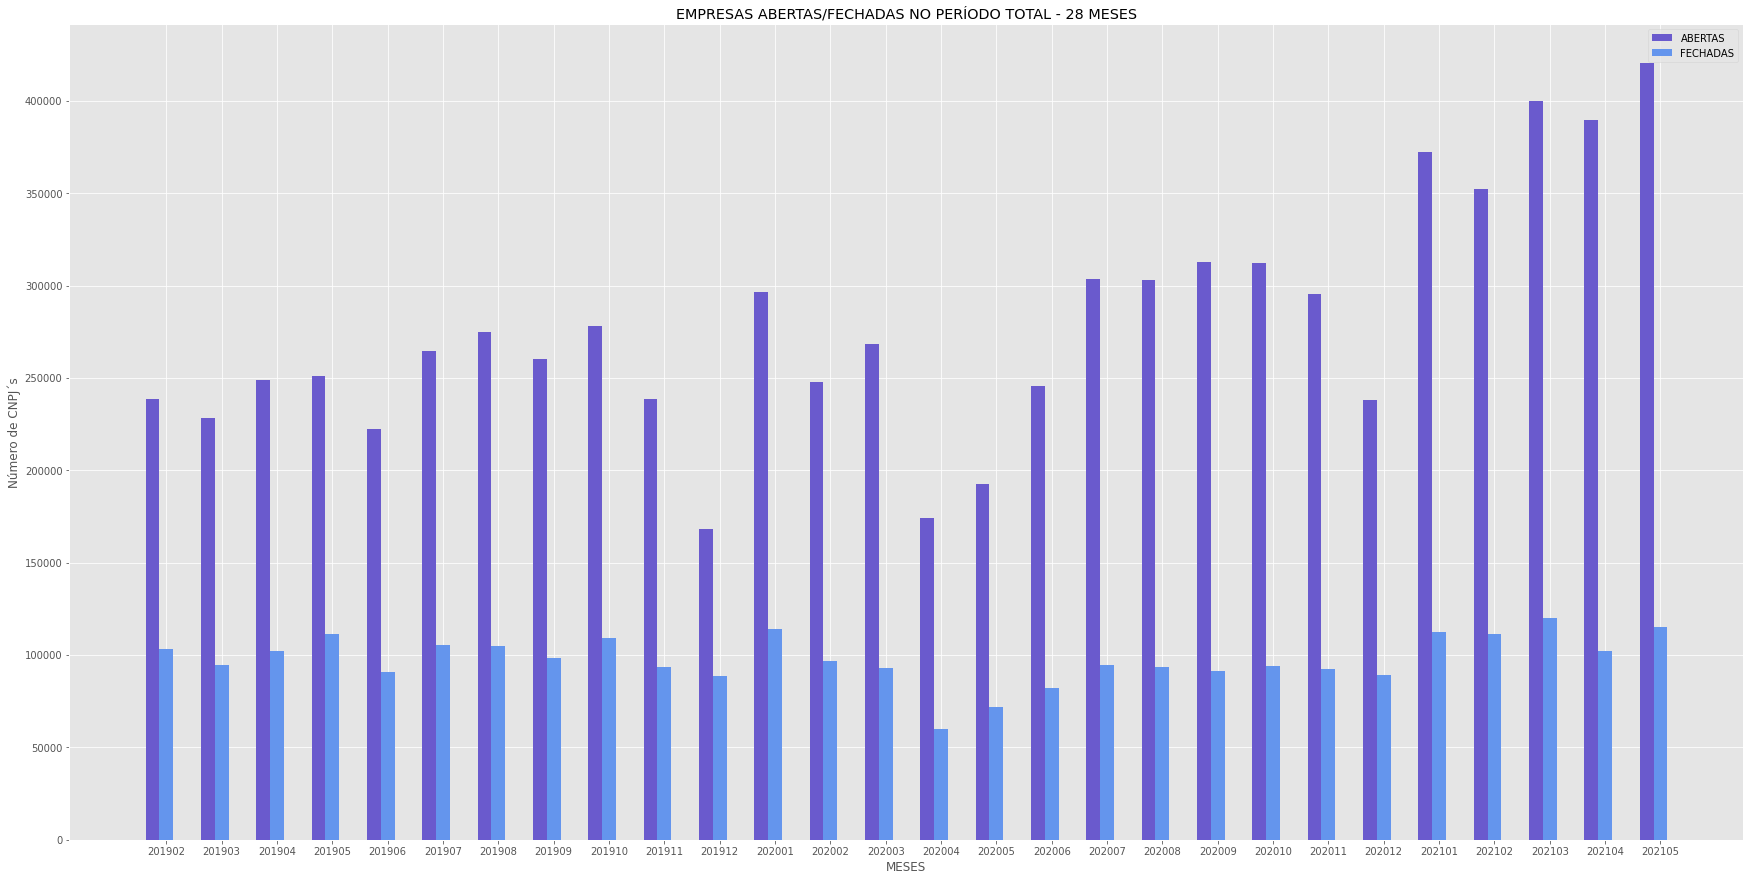

In [13]:
plt.figure(figsize=(30,15))
plt.bar(r1, cnpj_final_abertas_total_graf_data, color='#6A5ACD', width=barWidth, label='ABERTAS')
plt.bar(r2, cnpj_final_fechadas_total_graf_data, color='#6495ED', width=barWidth, label='FECHADAS')

plt.xlabel('MESES')
plt.xticks([r + barWidth for r in range(len(cnpj_final_abertas_total_graf_data))], cnpj_final_abertas_total_graf_data.index)
plt.ylabel('Número de CNPJ´s')
plt.title("EMPRESAS ABERTAS/FECHADAS NO PERÍODO TOTAL - 28 MESES")


plt.legend()
plt.show()

## **Análise das Empresas que Abriram e Fecharam por CNAE**

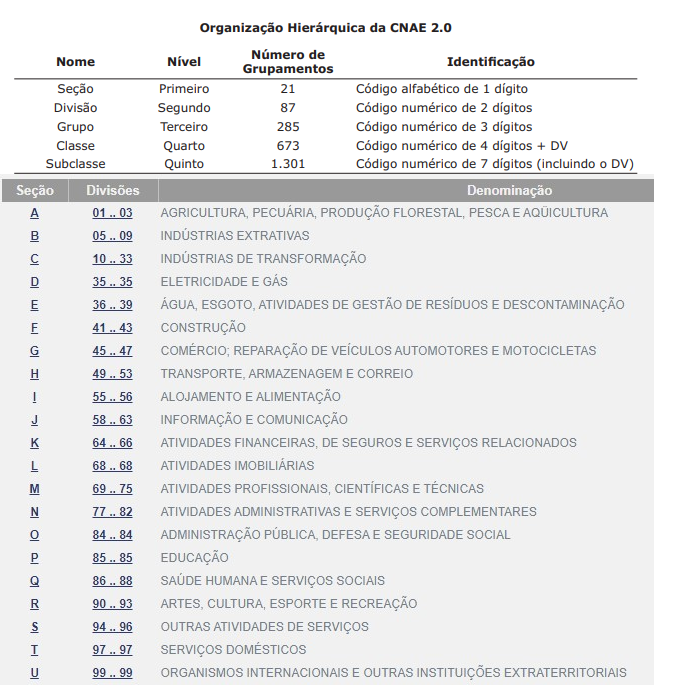

In [14]:
cnpj_final_abertas_total_graf_cnae = cnpj_final_abertas_total.groupby('cnae_secao')['cnae_secao'].count().sort_values(ascending=False)
cnpj_final_fechadas_total_graf_cnae = cnpj_final_fechadas_total.groupby('cnae_secao')['cnae_secao'].count().sort_values(ascending=False)

In [15]:
cnpj_abertas_fechadas_graf_cnae = pd.concat([cnpj_final_abertas_total_graf_cnae, cnpj_final_fechadas_total_graf_cnae], axis=1)
cnpj_abertas_fechadas_graf_cnae.columns = ['empresas_abertas', 'empresas_fechadas']

In [16]:
barWidth =  0.25
r1 = np.arange(len(cnpj_final_abertas_total_graf_cnae))
r2 = [x+barWidth for x in r1]

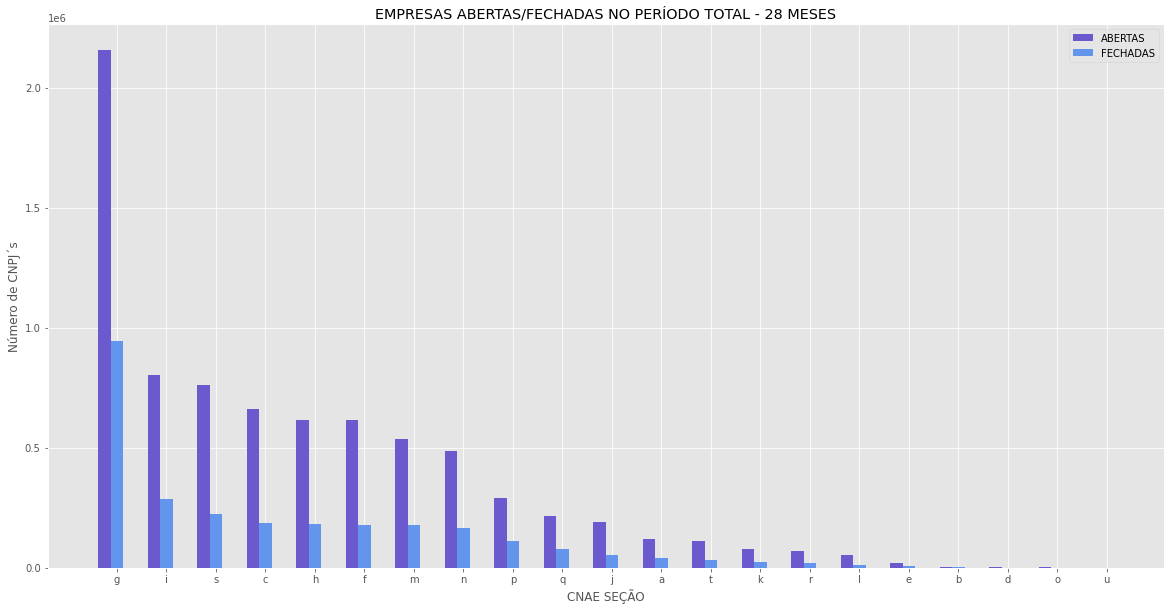

In [17]:
plt.figure(figsize=(20,10))
plt.bar(r1, cnpj_final_abertas_total_graf_cnae, color='#6A5ACD', width=barWidth, label='ABERTAS')
plt.bar(r2, cnpj_final_fechadas_total_graf_cnae, color='#6495ED', width=barWidth, label='FECHADAS')

plt.xlabel('CNAE SEÇÃO')
plt.xticks([r + barWidth for r in range(len(cnpj_final_abertas_total_graf_cnae))], cnpj_final_abertas_total_graf_cnae.index)
plt.ylabel('Número de CNPJ´s')
plt.title("EMPRESAS ABERTAS/FECHADAS NO PERÍODO TOTAL - 28 MESES")


plt.legend()
plt.show()

## **Análise das empresas que Abriram e Fecharam por IDH**

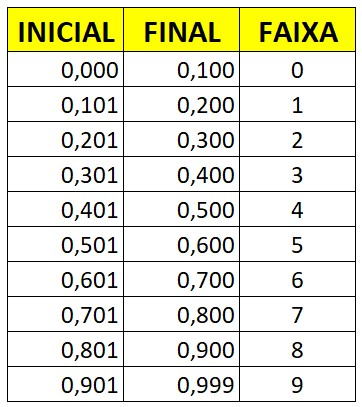

In [18]:
cnpj_final_idh = cnpj_final

In [19]:
cnpj_final_idh['idh_municipios_faixas_graf']=pd.cut(
   cnpj_final_idh['idh_municipio'],
   bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, sys.maxsize],
     labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

cnpj_final_idh['idh_educacao_municipios_faixas_graf']=pd.cut(
   cnpj_final_idh['idh_educacao'],
   bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, sys.maxsize],
     labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

cnpj_final_idh['idh_longevidade_municipios_faixas_graf']=pd.cut(
   cnpj_final_idh['idh_longevidade'],
   bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, sys.maxsize],
     labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

cnpj_final_idh['idh_renda_municipios_faixas_graf']=pd.cut(
   cnpj_final_idh['idh_renda'],
   bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, sys.maxsize],
     labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

In [20]:
cnpj_final_abertas_idh = cnpj_final_idh.query( 'codigo_situacao_cadastral== 2 ')
cnpj_final_fechadas_idh = cnpj_final_idh.query( 'codigo_situacao_cadastral== 8 ')

In [21]:
cnpj_final_abertas_total_graf_idh = cnpj_final_abertas_idh.groupby('idh_municipios_faixas_graf')['idh_municipios_faixas_graf'].count()
cnpj_final_fechadas_total_graf_idh = cnpj_final_fechadas_idh.groupby('idh_municipios_faixas_graf')['idh_municipios_faixas_graf'].count()

In [22]:
cnpj_final_abertas_total_graf_idh_edu = cnpj_final_abertas_idh.groupby('idh_educacao_municipios_faixas_graf')['idh_educacao_municipios_faixas_graf'].count()
cnpj_final_fechadas_total_graf_idh_edu = cnpj_final_fechadas_idh.groupby('idh_educacao_municipios_faixas_graf')['idh_educacao_municipios_faixas_graf'].count()

In [23]:
cnpj_final_abertas_total_graf_idh_long = cnpj_final_abertas_idh.groupby('idh_longevidade_municipios_faixas_graf')['idh_longevidade_municipios_faixas_graf'].count()
cnpj_final_fechadas_total_graf_idh_long = cnpj_final_fechadas_idh.groupby('idh_longevidade_municipios_faixas_graf')['idh_longevidade_municipios_faixas_graf'].count()

In [24]:
cnpj_final_abertas_total_graf_idh_renda = cnpj_final_abertas_idh.groupby('idh_renda_municipios_faixas_graf')['idh_renda_municipios_faixas_graf'].count()
cnpj_final_fechadas_total_graf_idh_renda = cnpj_final_fechadas_idh.groupby('idh_renda_municipios_faixas_graf')['idh_renda_municipios_faixas_graf'].count()

### ***ABRIRAM POR IDH***

In [25]:
barWidth =  0.25
r1 = np.arange(len(cnpj_final_abertas_total_graf_idh))
r2 = [x+barWidth for x in r1]
r3 = [x+barWidth for x in r2]
r4 = [x+barWidth for x in r3]

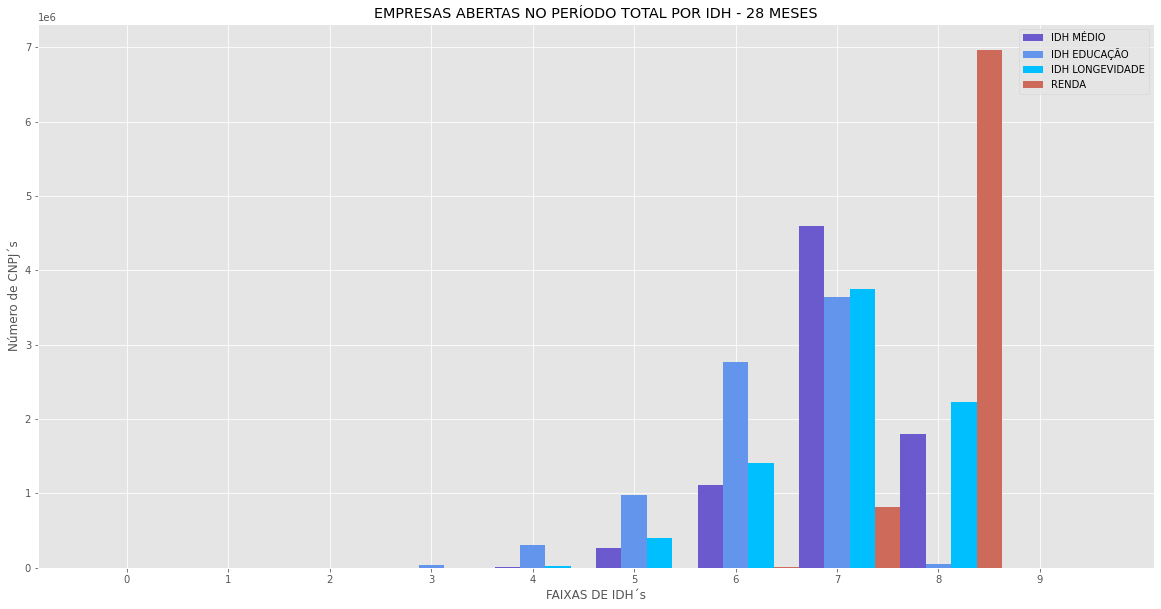

In [26]:
plt.figure(figsize=(20,10))
plt.bar(r1, cnpj_final_abertas_total_graf_idh, color='#6A5ACD', width=barWidth, label='IDH MÉDIO')
plt.bar(r2, cnpj_final_abertas_total_graf_idh_edu, color='#6495ED', width=barWidth, label='IDH EDUCAÇÃO')
plt.bar(r3, cnpj_final_abertas_total_graf_idh_long, color='#00BFFF', width=barWidth, label='IDH LONGEVIDADE')
plt.bar(r4, cnpj_final_abertas_total_graf_idh_renda, color='#CD6A5A', width=barWidth, label='RENDA')

plt.xlabel('FAIXAS DE IDH´s')
plt.xticks([r + barWidth for r in range(len(cnpj_final_abertas_total_graf_idh))], cnpj_final_abertas_total_graf_idh.index)
plt.ylabel('Número de CNPJ´s')
plt.title("EMPRESAS ABERTAS NO PERÍODO TOTAL POR IDH - 28 MESES")


plt.legend()
plt.show()

### ***FECHARAM POR IDH***

In [27]:
barWidth =  0.25
r1 = np.arange(len(cnpj_final_fechadas_total_graf_idh))
r2 = [x+barWidth for x in r1]
r3 = [x+barWidth for x in r2]
r4 = [x+barWidth for x in r3]

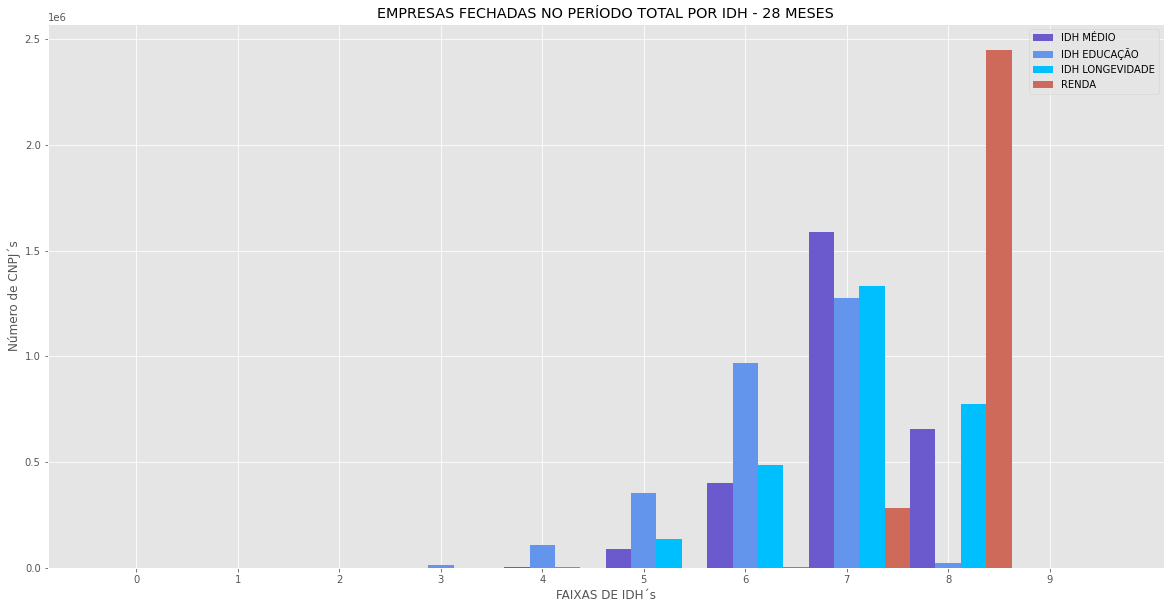

In [28]:
plt.figure(figsize=(20,10))
plt.bar(r1, cnpj_final_fechadas_total_graf_idh, color='#6A5ACD', width=barWidth, label='IDH MÉDIO')
plt.bar(r2, cnpj_final_fechadas_total_graf_idh_edu, color='#6495ED', width=barWidth, label='IDH EDUCAÇÃO')
plt.bar(r3, cnpj_final_fechadas_total_graf_idh_long, color='#00BFFF', width=barWidth, label='IDH LONGEVIDADE')
plt.bar(r4, cnpj_final_fechadas_total_graf_idh_renda, color='#CD6A5A', width=barWidth, label='RENDA')

plt.xlabel('FAIXAS DE IDH´s')
plt.xticks([r + barWidth for r in range(len(cnpj_final_fechadas_total_graf_idh))], cnpj_final_fechadas_total_graf_idh.index)
plt.ylabel('Número de CNPJ´s')
plt.title("EMPRESAS FECHADAS NO PERÍODO TOTAL POR IDH - 28 MESES")


plt.legend()
plt.show()

### ***ABRIRAM E FECHARAM POR IDH***

In [29]:
cnpj_abertas_fechadas_graf_idhs = pd.concat([cnpj_final_abertas_total_graf_idh, cnpj_final_fechadas_total_graf_idh,cnpj_final_abertas_total_graf_idh_edu,cnpj_final_fechadas_total_graf_idh_edu,cnpj_final_abertas_total_graf_idh_long,cnpj_final_fechadas_total_graf_idh_long,cnpj_final_abertas_total_graf_idh_renda,cnpj_final_fechadas_total_graf_idh_renda], axis=1)
cnpj_abertas_fechadas_graf_idhs.columns = ['IDH - ABERTAS', 'IDH - FECHADAS','IDH EDUCACAO - ABERTAS', 'IDH EDUCACAO - FECHADAS','IDH LONGEVIDADE - ABERTAS', 'IDH LONGEVIDADE - FECHADAS','IDH RENDA - ABERTAS', 'IDH RENDA - FECHADAS']

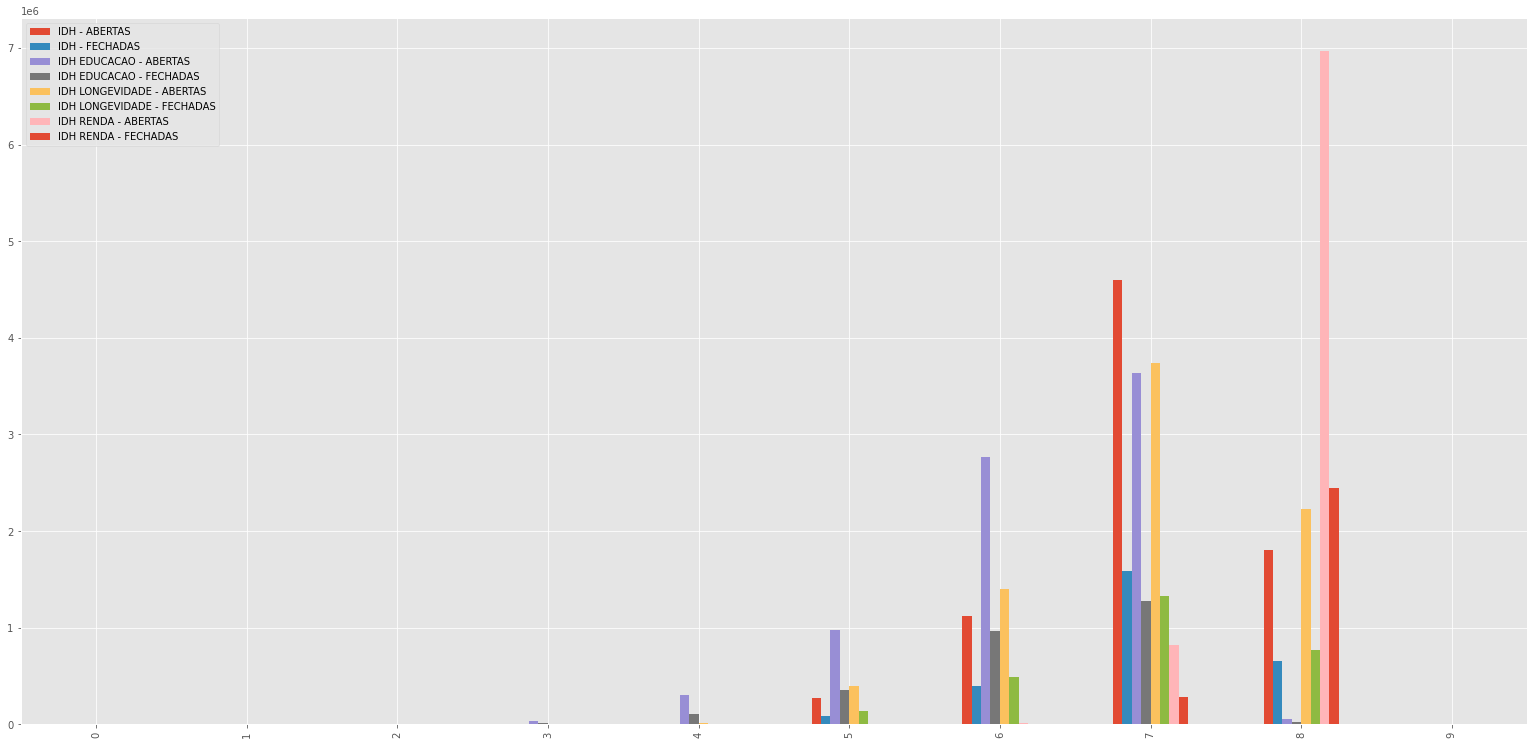

In [30]:
cnpj_abertas_fechadas_graf_idhs.plot(kind="bar",figsize=(27,13))
plt.show()

## **Análise das empresas que Abriram e Fecharam por Faixa de CAPITAL SOCIAL**

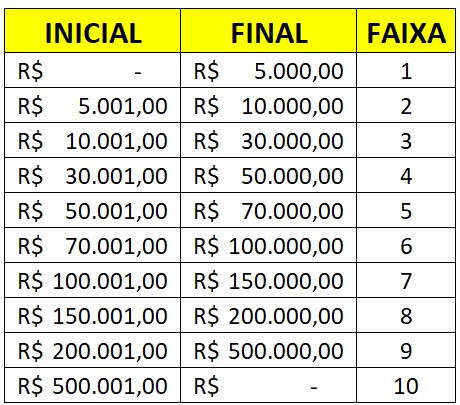

In [31]:
cnpj_final_abertas_total_graf_capital = cnpj_final_abertas_total.groupby('capital_social_faixas')['capital_social_faixas'].count().sort_values(ascending=False)
cnpj_final_fechadas_total_graf_capital = cnpj_final_fechadas_total.groupby('capital_social_faixas')['capital_social_faixas'].count().sort_values(ascending=False)

In [32]:
barWidth =  0.25
r1 = np.arange(len(cnpj_final_abertas_total_graf_capital))
r2 = [x+barWidth for x in r1]

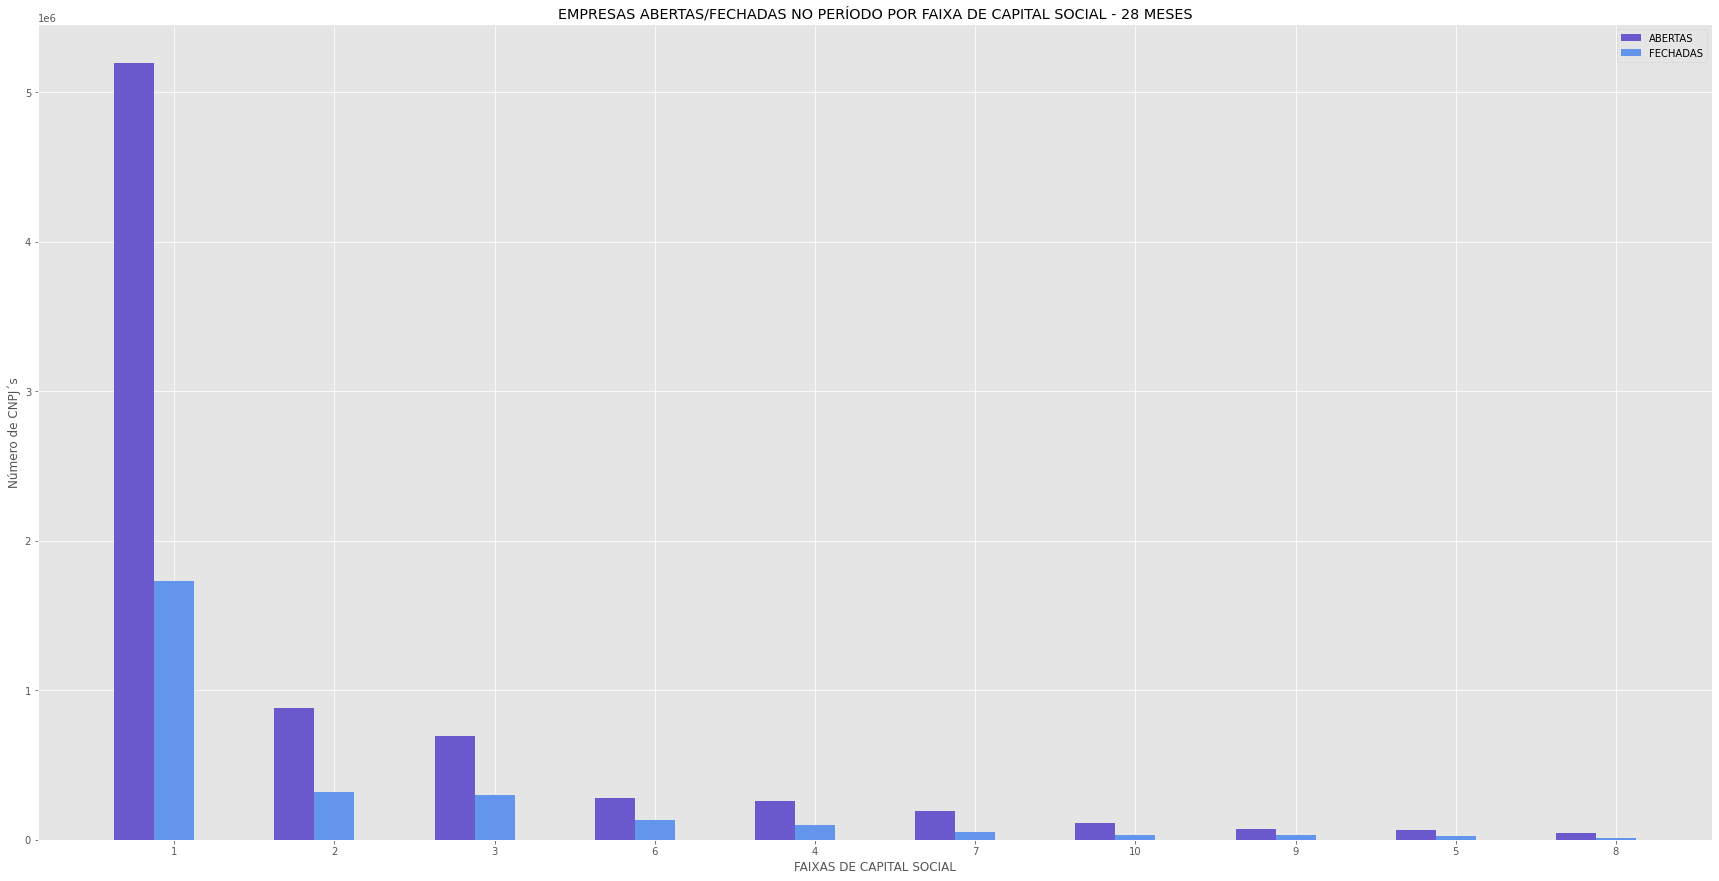

In [33]:
plt.figure(figsize=(30,15))
plt.bar(r1, cnpj_final_abertas_total_graf_capital, color='#6A5ACD', width=barWidth, label='ABERTAS')
plt.bar(r2, cnpj_final_fechadas_total_graf_capital, color='#6495ED', width=barWidth, label='FECHADAS')

plt.xlabel('FAIXAS DE CAPITAL SOCIAL')
plt.xticks([r + barWidth for r in range(len(cnpj_final_abertas_total_graf_capital))], cnpj_final_abertas_total_graf_capital.index)
plt.ylabel('Número de CNPJ´s')
plt.title("EMPRESAS ABERTAS/FECHADAS NO PERÍODO POR FAIXA DE CAPITAL SOCIAL - 28 MESES")


plt.legend()
plt.show()

## **Análise das empresas que Abriram e Fecharam por REGIÃO**

In [34]:
cnpj_final_abertas_total_graf_regiao = cnpj_final_abertas_total.groupby('regiao')['regiao'].count().sort_values(ascending=False)
cnpj_final_fechadas_total_graf_regiao = cnpj_final_fechadas_total.groupby('regiao')['regiao'].count().sort_values(ascending=False)

In [35]:
barWidth =  0.25
r1 = np.arange(len(cnpj_final_abertas_total_graf_regiao))
r2 = [x+barWidth for x in r1]

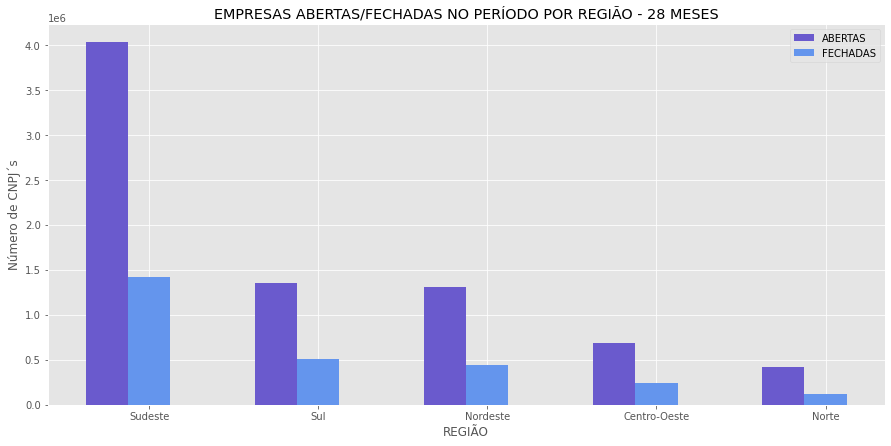

In [36]:
plt.figure(figsize=(15,7))
plt.bar(r1, cnpj_final_abertas_total_graf_regiao, color='#6A5ACD', width=barWidth, label='ABERTAS')
plt.bar(r2, cnpj_final_fechadas_total_graf_regiao, color='#6495ED', width=barWidth, label='FECHADAS')

plt.xlabel('REGIÃO')
plt.xticks([r + barWidth for r in range(len(cnpj_final_abertas_total_graf_regiao))], cnpj_final_abertas_total_graf_regiao.index)
plt.ylabel('Número de CNPJ´s')
plt.title("EMPRESAS ABERTAS/FECHADAS NO PERÍODO POR REGIÃO - 28 MESES")


plt.legend()
plt.show()

## **Análise das empresas que Abriram e Fecharam por ESTADO**

In [37]:
cnpj_final_abertas_total_graf_estado = cnpj_final_abertas_total.groupby('estado')['estado'].count().sort_values(ascending=False)
cnpj_final_fechadas_total_graf_estado = cnpj_final_fechadas_total.groupby('estado')['estado'].count().sort_values(ascending=False)

In [38]:
barWidth =  0.25
r1 = np.arange(len(cnpj_final_abertas_total_graf_estado))
r2 = [x+barWidth for x in r1]

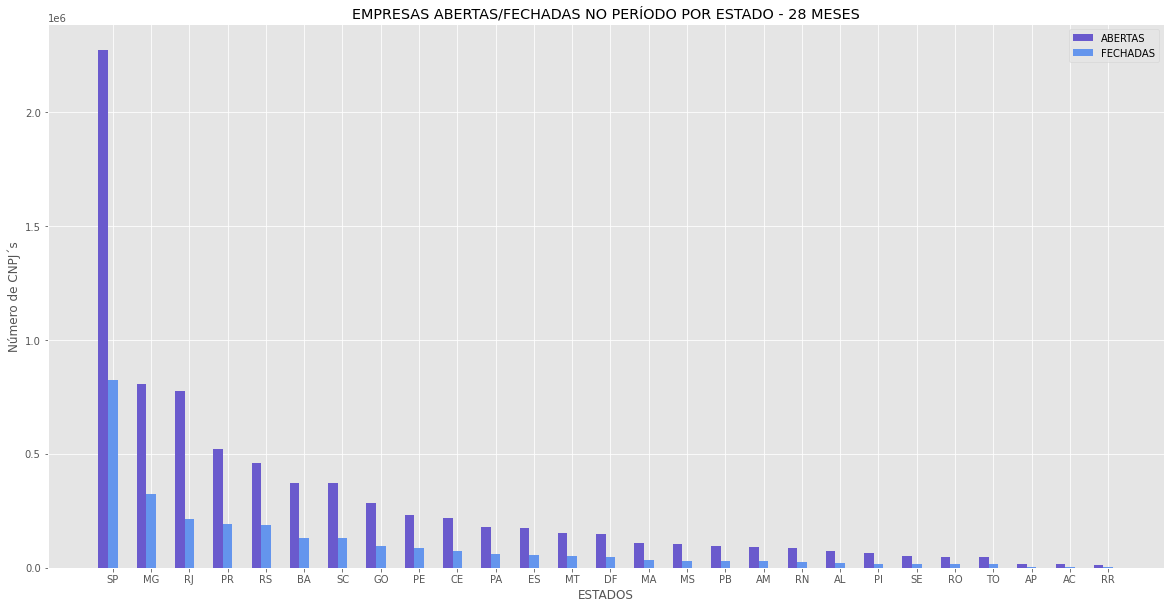

In [39]:
plt.figure(figsize=(20,10))
plt.bar(r1, cnpj_final_abertas_total_graf_estado, color='#6A5ACD', width=barWidth, label='ABERTAS')
plt.bar(r2, cnpj_final_fechadas_total_graf_estado, color='#6495ED', width=barWidth, label='FECHADAS')

plt.xlabel('ESTADOS')
plt.xticks([r + barWidth for r in range(len(cnpj_final_abertas_total_graf_estado))], cnpj_final_abertas_total_graf_estado.index)
plt.ylabel('Número de CNPJ´s')
plt.title("EMPRESAS ABERTAS/FECHADAS NO PERÍODO POR ESTADO - 28 MESES")


plt.legend()
plt.show()

## **Análise das empresas que Abriram e Fecharam por INTERIOR / METROPOLITANA**

In [40]:
cnpj_final_abertas_total_graf_int_metro = cnpj_final_abertas_total.groupby('interior_metropolitana')['interior_metropolitana'].count().sort_values(ascending=False)
cnpj_final_fechadas_total_graf_int_metro = cnpj_final_fechadas_total.groupby('interior_metropolitana')['interior_metropolitana'].count().sort_values(ascending=False)

In [41]:
barWidth =  0.25
r1 = np.arange(len(cnpj_final_abertas_total_graf_int_metro))
r2 = [x+barWidth for x in r1]

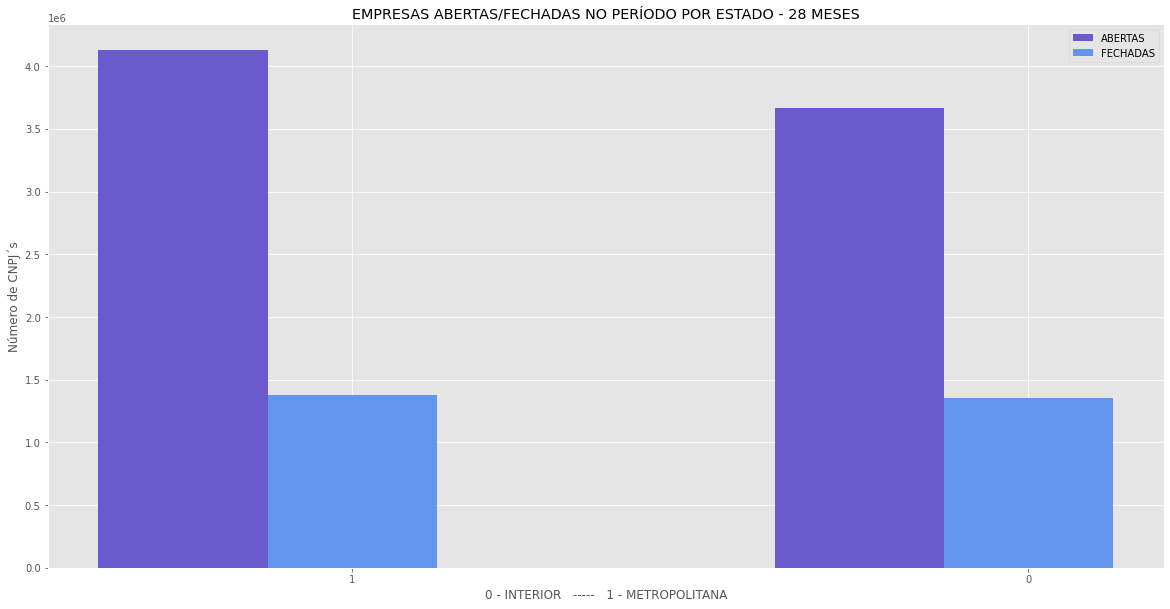

In [42]:
plt.figure(figsize=(20,10))
plt.bar(r1, cnpj_final_abertas_total_graf_int_metro, color='#6A5ACD', width=barWidth, label='ABERTAS')
plt.bar(r2, cnpj_final_fechadas_total_graf_int_metro, color='#6495ED', width=barWidth, label='FECHADAS')

plt.xlabel('0 - INTERIOR   -----   1 - METROPOLITANA')
plt.xticks([r + barWidth for r in range(len(cnpj_final_abertas_total_graf_int_metro))], cnpj_final_abertas_total_graf_int_metro.index)
plt.ylabel('Número de CNPJ´s')
plt.title("EMPRESAS ABERTAS/FECHADAS NO PERÍODO POR ESTADO - 28 MESES")


plt.legend()
plt.show()

## **Análise das empresas que Abriram e Fecharam considerando as faixas percentuais de Casos e Óbitos por COVID**

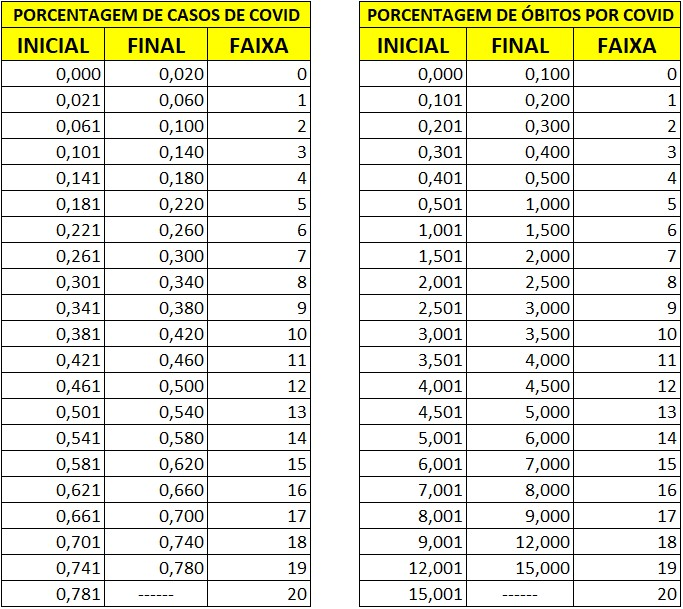

In [43]:
cnpj_final_fechadas_total_graf_com_covid_casos = cnpj_final_fechadas_com_covid.groupby('casos_acumulados_porcentagem_covid_faixas')['casos_acumulados_porcentagem_covid_faixas'].count()
cnpj_final_fechadas_total_graf_covid_obitos = cnpj_final_fechadas_total.groupby('obitos_acumulados_porcentagem_covid_faixas')['obitos_acumulados_porcentagem_covid_faixas'].count()

### **ANÁLISE SOMENTE DAS EMPRESAS QUE FECHARAM DURANTE O PERÍODO DE COVID DE 14 MESES - CASOS ACUMULADOS**

Nesse caso, iremos considerar somente as empresas que fecharam durante os 14 meses de COVID (01/04/2020 a 31/05/2021) pois nos 14 meses anteriores não tivemos casos de COVID.

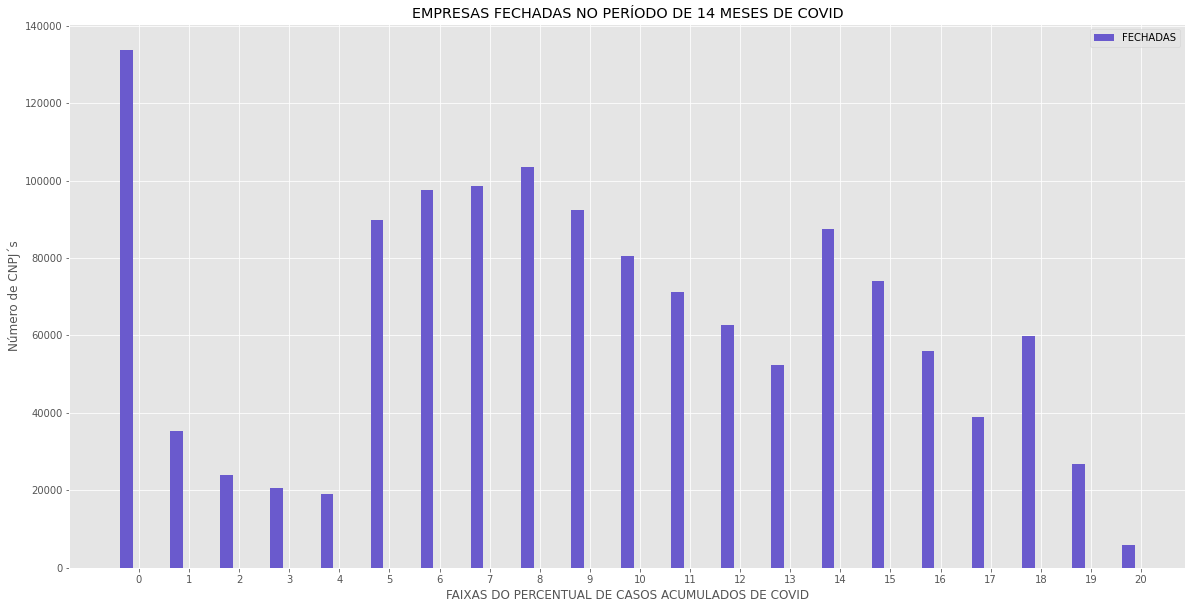

In [44]:
barWidth =  0.25
r1 = np.arange(len(cnpj_final_fechadas_total_graf_com_covid_casos))

plt.figure(figsize=(20,10))
plt.bar(r1, cnpj_final_fechadas_total_graf_com_covid_casos, color='#6A5ACD', width=barWidth, label='FECHADAS')


plt.xlabel('FAIXAS DO PERCENTUAL DE CASOS ACUMULADOS DE COVID')
plt.xticks([r + barWidth for r in range(len(cnpj_final_fechadas_total_graf_com_covid_casos))], cnpj_final_fechadas_total_graf_com_covid_casos.index)
plt.ylabel('Número de CNPJ´s')
plt.title("EMPRESAS FECHADAS NO PERÍODO DE 14 MESES DE COVID")


plt.legend()
plt.show()

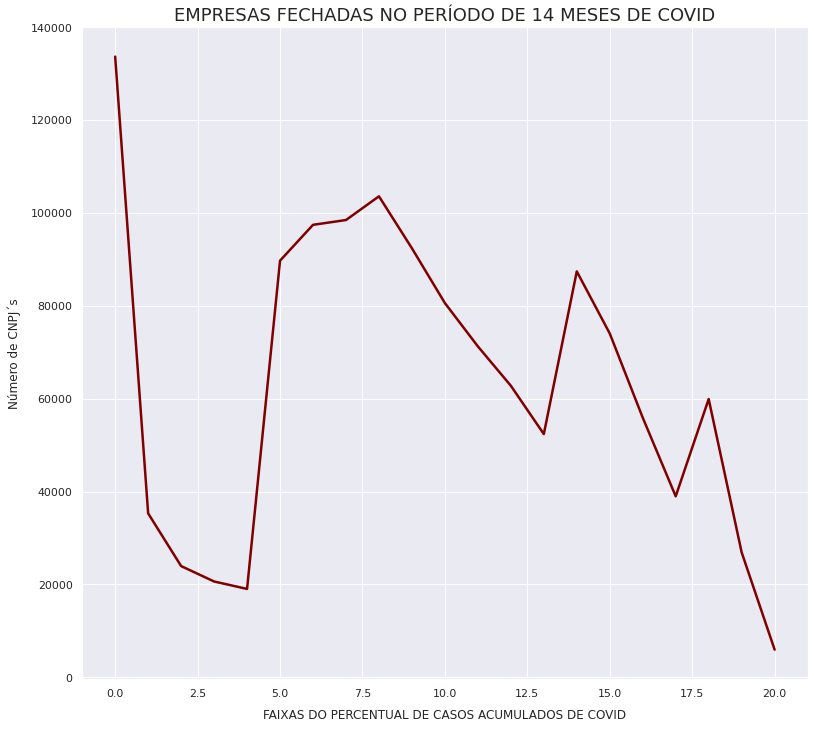

In [45]:
sns.set(font_scale=1)
cnpj_final_fechadas_total_graf_com_covid_casos.plot(figsize=(13, 12), linewidth=2.5, color=['maroon','blue'])
plt.xlabel("FAIXAS DO PERCENTUAL DE CASOS ACUMULADOS DE COVID", labelpad=10)
plt.ylabel("Número de CNPJ´s", labelpad=10)
plt.title("EMPRESAS FECHADAS NO PERÍODO DE 14 MESES DE COVID", y=1, fontsize=18);

### **ANÁLISE SOMENTE DAS EMPRESAS QUE FECHARAM DURANTE O PERÍODO DE COVID DE 14 MESES - ÓBITOS ACUMULADOS**

Nesse caso, iremos considerar somente as empresas que fecharam durante os 14 meses de COVID (01/04/2020 a 31/05/2021) pois nos 14 meses anteriores não tivemos casos de COVID.

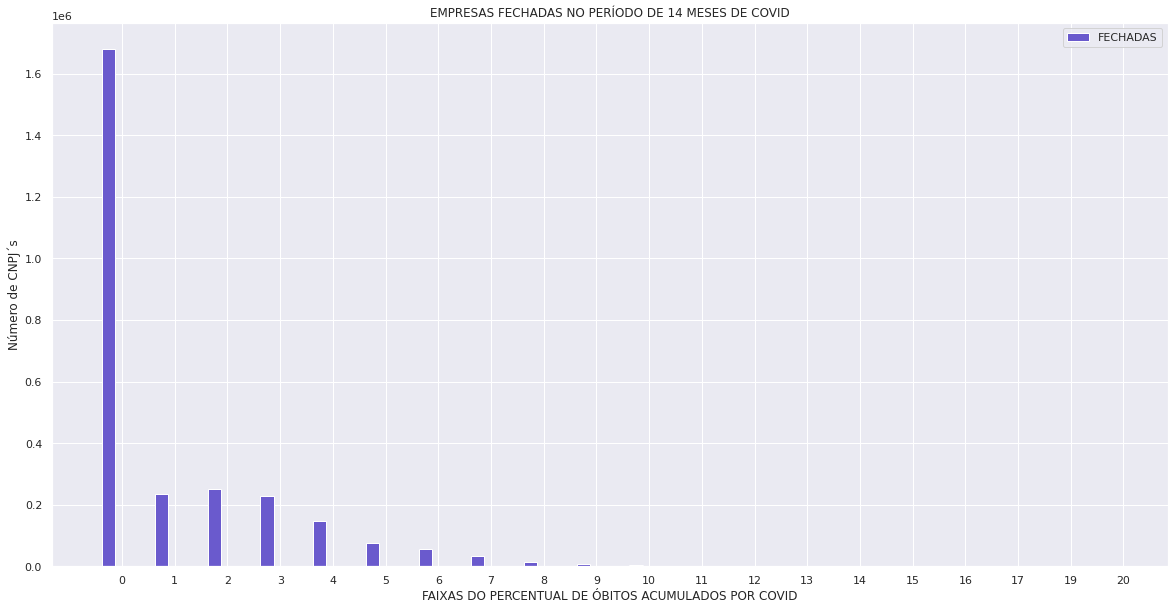

In [46]:
barWidth =  0.25
r1 = np.arange(len(cnpj_final_fechadas_total_graf_covid_obitos))

plt.figure(figsize=(20,10))
plt.bar(r1, cnpj_final_fechadas_total_graf_covid_obitos, color='#6A5ACD', width=barWidth, label='FECHADAS')


plt.xlabel('FAIXAS DO PERCENTUAL DE ÓBITOS ACUMULADOS POR COVID')
plt.xticks([r + barWidth for r in range(len(cnpj_final_fechadas_total_graf_covid_obitos))], cnpj_final_fechadas_total_graf_covid_obitos.index)
plt.ylabel('Número de CNPJ´s')
plt.title("EMPRESAS FECHADAS NO PERÍODO DE 14 MESES DE COVID")


plt.legend()
plt.show()

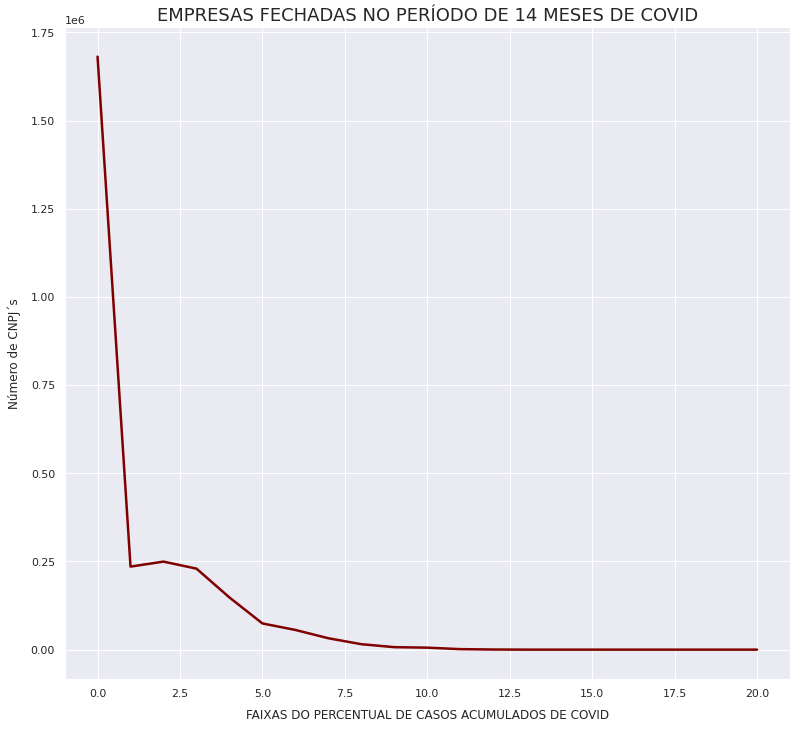

In [47]:
sns.set(font_scale=1)
cnpj_final_fechadas_total_graf_covid_obitos.plot(figsize=(13, 12), linewidth=2.5, color=['maroon','blue'])
plt.xlabel("FAIXAS DO PERCENTUAL DE CASOS ACUMULADOS DE COVID", labelpad=10)
plt.ylabel("Número de CNPJ´s", labelpad=10)
plt.title("EMPRESAS FECHADAS NO PERÍODO DE 14 MESES DE COVID", y=1, fontsize=18);

## **Análise das empresas que Abriram e Fecharam por PIB PERCAPITA DO MUNICÍPIO por Faixa**

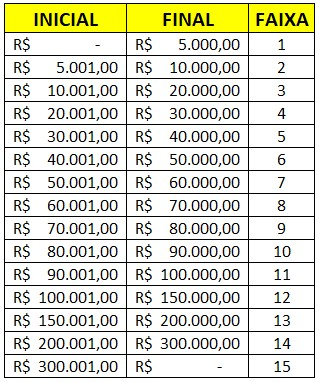

In [48]:
cnpj_final_abertas_total_graf_pib = cnpj_final_abertas_total.groupby('pib_per_capita_faixas')['pib_per_capita_faixas'].count()
cnpj_final_fechadas_total_graf_pib = cnpj_final_fechadas_total.groupby('pib_per_capita_faixas')['pib_per_capita_faixas'].count()

In [49]:
barWidth =  0.25
r1 = np.arange(len(cnpj_final_abertas_total_graf_pib))
r2 = [x+barWidth for x in r1]

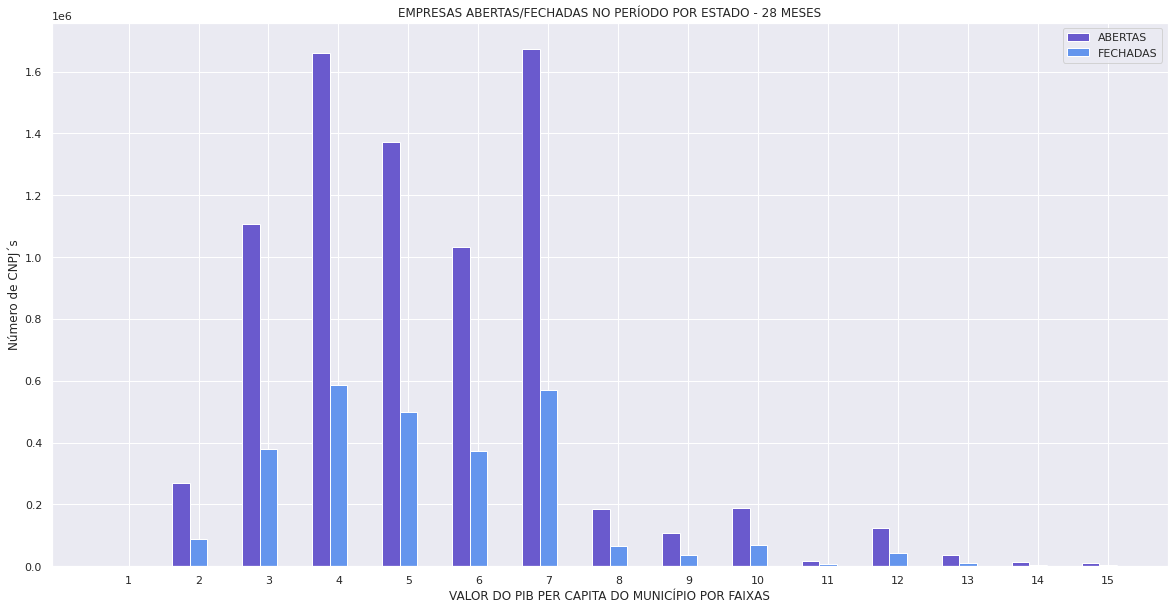

In [50]:
plt.figure(figsize=(20,10))
plt.bar(r1, cnpj_final_abertas_total_graf_pib, color='#6A5ACD', width=barWidth, label='ABERTAS')
plt.bar(r2, cnpj_final_fechadas_total_graf_pib, color='#6495ED', width=barWidth, label='FECHADAS')

plt.xlabel('VALOR DO PIB PER CAPITA DO MUNICÍPIO POR FAIXAS')
plt.xticks([r + barWidth for r in range(len(cnpj_final_abertas_total_graf_pib))], cnpj_final_abertas_total_graf_pib.index)
plt.ylabel('Número de CNPJ´s')
plt.title("EMPRESAS ABERTAS/FECHADAS NO PERÍODO POR ESTADO - 28 MESES")


plt.legend()
plt.show()

# **SEPARAÇÃO DAS VARIÁVEIS EM CATEGÓRICAS E QUANTITATIVAS**

## **Limpeza do DATASET**

In [51]:
cnpj_final.columns

Index(['cnpj_basico', 'cnpj_ordem', 'cnpj_dv', 'matriz_filial',
       'capital_social', 'capital_social_faixas', 'codigo_situacao_cadastral',
       'data_inicio_atividade', 'data_situacao_cadastral',
       'data_situacao_cadastral_ano_mes', 'situacao_cadastral_target',
       'codigo_ibge', 'codigo_municipio_siafi', 'descricao_municipio',
       'regiao', 'estado', 'interior_metropolitana', 'casosAcumulado_covid',
       'obitosAcumulado_covid', 'casos_acumulados_porcentagem_covid',
       'obitos_acumulados_porcentagem_covid',
       'casos_acumulados_porcentagem_covid_faixas',
       'obitos_acumulados_porcentagem_covid_faixas', 'idh_municipio',
       'idh_educacao', 'idh_longevidade', 'idh_renda', 'idh_municipios_faixas',
       'idh_educacao_municipios_faixas', 'idh_longevidade_municipios_faixas',
       'idh_renda_municipios_faixas', 'populacaoTCU2019', 'pib',
       'pib_per_capita', 'pib_per_capita_faixas', 'cnae_principal',
       'cnae_divisao', 'cnae_secao', 'cnae_descric

**ELIMINAÇÃO DE VARIÁVEIS**

Nesta etapa será realizada a separação e análise das várias em categóricas e quantitativas. Além dessa ação, foi feita a eliminação de variáveis desnecessárias para a modelagem e utilizadas somente para a visualização gráfica feita na etapa anterior.

In [52]:
cnpj_final = cnpj_final.drop(['cnpj_basico','cnpj_ordem','cnpj_dv','codigo_situacao_cadastral','data_inicio_atividade','data_situacao_cadastral','codigo_ibge','codigo_municipio_siafi','descricao_municipio','populacaoTCU2019','pib','cnae_principal','cnae_descricao'], axis=1) #eliminação das colunas desnecessárias

## **Análise Exploratória de dados das variáveis Quantitativas**

In [53]:
cnpj_final_quantitativas = cnpj_final[['capital_social','casosAcumulado_covid','obitosAcumulado_covid','casos_acumulados_porcentagem_covid','obitos_acumulados_porcentagem_covid',
                                       'idh_municipio','idh_educacao','idh_longevidade','idh_renda','pib_per_capita','capital_social_faixas','casos_acumulados_porcentagem_covid_faixas',
                                       'obitos_acumulados_porcentagem_covid_faixas','idh_municipios_faixas','idh_educacao_municipios_faixas','idh_longevidade_municipios_faixas','idh_renda_municipios_faixas','pib_per_capita_faixas']]

In [54]:
cnpj_final_quantitativas.nunique()

capital_social                                54293
casosAcumulado_covid                          32081
obitosAcumulado_covid                          4641
casos_acumulados_porcentagem_covid            16422
obitos_acumulados_porcentagem_covid             531
idh_municipio                                   349
idh_educacao                                    466
idh_longevidade                                 390
idh_renda                                       220
pib_per_capita                                 5562
capital_social_faixas                            10
casos_acumulados_porcentagem_covid_faixas        21
obitos_acumulados_porcentagem_covid_faixas       21
idh_municipios_faixas                             5
idh_educacao_municipios_faixas                    7
idh_longevidade_municipios_faixas                 6
idh_renda_municipios_faixas                       3
pib_per_capita_faixas                            15
dtype: int64

**Estatística descritiva**

In [55]:
cnpj_final_quantitativas.describe()

,capital_social,casosAcumulado_covid,obitosAcumulado_covid,casos_acumulados_porcentagem_covid,obitos_acumulados_porcentagem_covid,idh_municipio,idh_educacao,idh_longevidade,idh_renda,pib_per_capita,capital_social_faixas,casos_acumulados_porcentagem_covid_faixas,obitos_acumulados_porcentagem_covid_faixas,idh_municipios_faixas,idh_educacao_municipios_faixas,idh_longevidade_municipios_faixas,idh_renda_municipios_faixas,pib_per_capita_faixas
count,"10,534,042.00","10,534,042.00","10,534,042.00","10,534,042.00","10,534,042.00","10,534,042.00","10,534,042.00","10,534,042.00","10,534,042.00","10,534,042.00","10,534,042.00","10,534,042.00","10,534,042.00","10,534,042.00","10,534,042.00","10,534,042.00","10,534,042.00","10,534,042.00"
mean,"29,693,229.55","61,062.54","2,491.26",3.86,0.11,0.75,0.67,0.75,0.84,"40,086.92",2.01,7.68,2.79,7.02,6.26,7.00,7.89,5.40
std,"1,397,425,337.23","164,444.57","6,984.40",4.63,0.13,0.06,0.08,0.08,0.03,"26,093.01",1.94,7.89,3.22,0.72,0.87,0.83,0.32,2.09
min,0.00,0.00,0.00,0.00,0.00,0.42,0.21,0.40,0.67,"4,788.18",1.00,0.00,0.00,4.00,2.00,3.00,6.00,1.00
25%,"1,000.00",0.00,0.00,0.00,0.00,0.72,0.63,0.71,0.82,"22,965.66",1.00,0.00,0.00,7.00,6.00,7.00,8.00,4.00
50%,"3,000.00",485.00,10.00,1.22,0.04,0.76,0.70,0.75,0.84,"36,445.75",1.00,6.00,1.00,7.00,6.00,7.00,8.00,5.00
75%,"10,000.00","24,621.00",735.00,7.29,0.23,0.80,0.72,0.82,0.85,"54,426.08",2.00,16.00,6.00,7.00,7.00,8.00,8.00,7.00
max,"438,002,148,502.00","783,191.00","30,596.00",42.41,3.13,0.86,0.82,0.89,0.89,"583,171.85",10.00,20.00,20.00,8.00,8.00,8.00,8.00,15.00


In [56]:
cnpj_final_quantitativas.median()

capital_social                                3,000.00
casosAcumulado_covid                            485.00
obitosAcumulado_covid                            10.00
casos_acumulados_porcentagem_covid                1.22
obitos_acumulados_porcentagem_covid               0.04
idh_municipio                                     0.76
idh_educacao                                      0.70
idh_longevidade                                   0.75
idh_renda                                         0.84
pib_per_capita                               36,445.75
capital_social_faixas                             1.00
casos_acumulados_porcentagem_covid_faixas         6.00
obitos_acumulados_porcentagem_covid_faixas        1.00
idh_municipios_faixas                             7.00
idh_educacao_municipios_faixas                    6.00
idh_longevidade_municipios_faixas                 7.00
idh_renda_municipios_faixas                       8.00
pib_per_capita_faixas                             5.00
dtype: flo

In [57]:
cnpj_final_quantitativas.mode()

,capital_social,casosAcumulado_covid,obitosAcumulado_covid,casos_acumulados_porcentagem_covid,obitos_acumulados_porcentagem_covid,idh_municipio,idh_educacao,idh_longevidade,idh_renda,pib_per_capita,capital_social_faixas,casos_acumulados_porcentagem_covid_faixas,obitos_acumulados_porcentagem_covid_faixas,idh_municipios_faixas,idh_educacao_municipios_faixas,idh_longevidade_municipios_faixas,idh_renda_municipios_faixas,pib_per_capita_faixas
0,"1,000.00",0.00,0.00,0.00,0.00,0.81,0.72,0.84,0.85,"58,691.90",1,0,0,7,7,7,8,4


**Correlação das variáveis**

In [58]:
cnpj_final_quantitativas.corr()

,capital_social,casosAcumulado_covid,obitosAcumulado_covid,casos_acumulados_porcentagem_covid,obitos_acumulados_porcentagem_covid,idh_municipio,idh_educacao,idh_longevidade,idh_renda,pib_per_capita,capital_social_faixas,casos_acumulados_porcentagem_covid_faixas,obitos_acumulados_porcentagem_covid_faixas,idh_municipios_faixas,idh_educacao_municipios_faixas,idh_longevidade_municipios_faixas,idh_renda_municipios_faixas,pib_per_capita_faixas
capital_social,1.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.09,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00
casosAcumulado_covid,0.00,1.00,0.95,0.26,0.43,0.29,0.23,0.36,0.17,0.20,-0.01,0.35,0.42,0.35,0.26,0.36,0.12,0.23
obitosAcumulado_covid,0.00,0.95,1.00,0.20,0.45,0.28,0.22,0.36,0.15,0.19,-0.02,0.31,0.45,0.30,0.26,0.36,0.12,0.22
casos_acumulados_porcentagem_covid,-0.00,0.26,0.20,1.00,0.83,0.07,0.06,0.06,0.08,0.06,0.00,0.94,0.83,0.05,0.05,0.05,0.05,0.07
obitos_acumulados_porcentagem_covid,-0.00,0.43,0.45,0.83,1.00,0.15,0.14,0.16,0.10,0.08,-0.02,0.89,1.00,0.11,0.14,0.15,0.11,0.10
idh_municipio,0.00,0.29,0.28,0.07,0.15,1.00,0.96,0.96,0.82,0.47,-0.04,0.05,0.15,0.90,0.92,0.91,0.69,0.58
idh_educacao,0.00,0.23,0.22,0.06,0.14,0.96,1.00,0.85,0.72,0.41,-0.04,0.05,0.14,0.84,0.95,0.81,0.63,0.50
idh_longevidade,0.00,0.36,0.36,0.06,0.16,0.96,0.85,1.00,0.75,0.50,-0.03,0.05,0.15,0.88,0.84,0.95,0.62,0.61
idh_renda,0.00,0.17,0.15,0.08,0.10,0.82,0.72,0.75,1.00,0.41,-0.05,0.05,0.09,0.75,0.70,0.72,0.76,0.49
pib_per_capita,0.00,0.20,0.19,0.06,0.08,0.47,0.41,0.50,0.41,1.00,0.00,0.04,0.08,0.43,0.43,0.46,0.28,0.93


**Mapa de calor da correlação das variáveis**

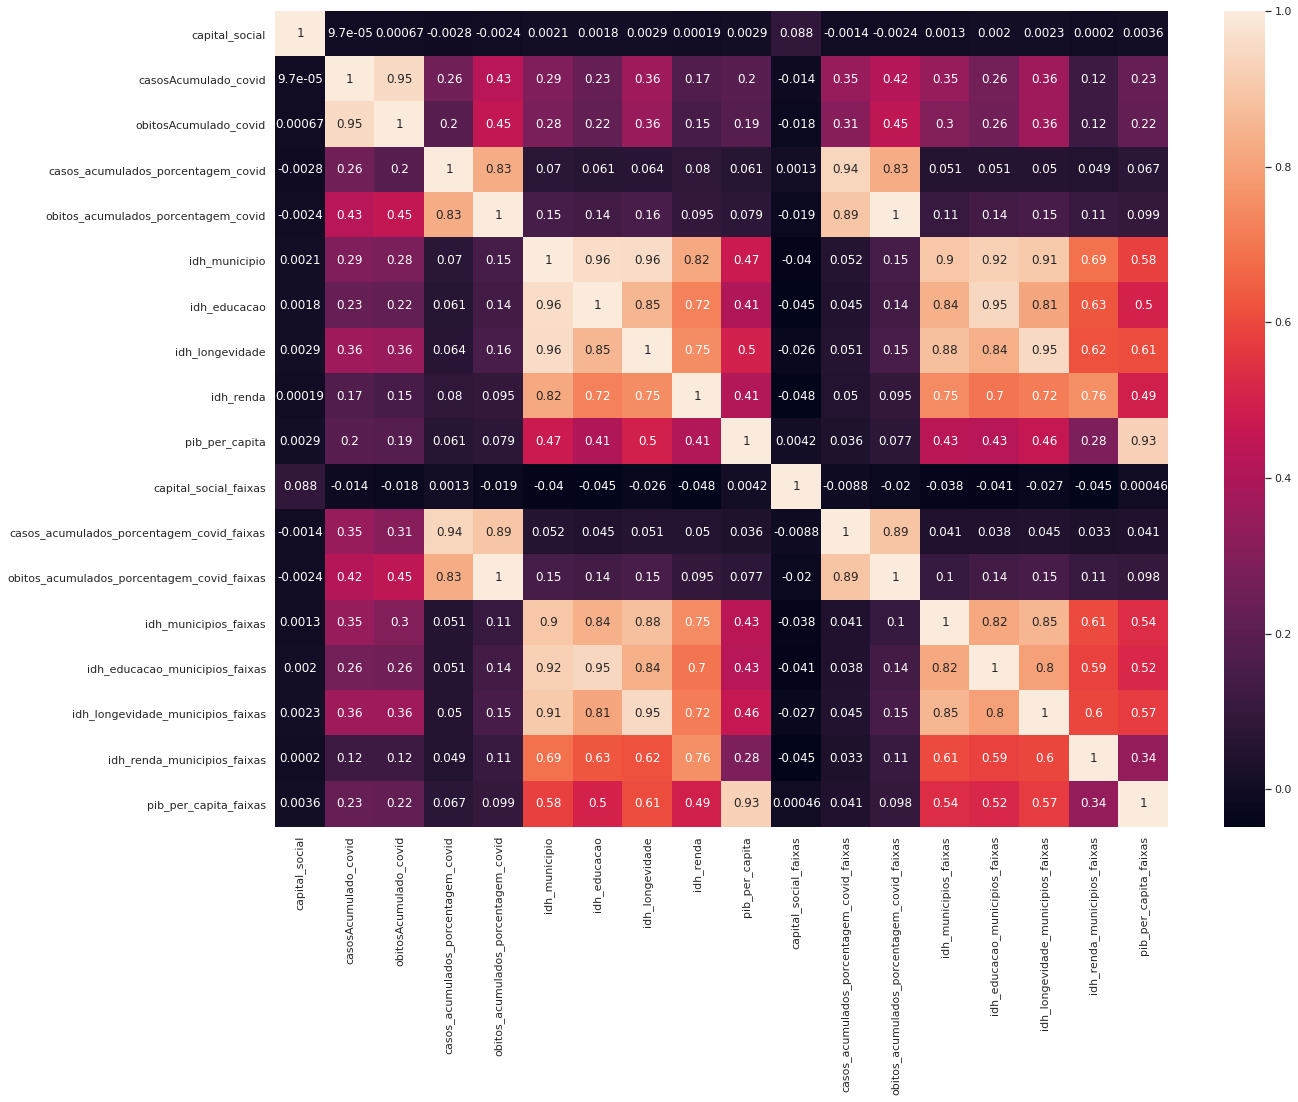

In [59]:
plt.figure(figsize=(20,15))
sns.heatmap(cnpj_final_quantitativas.corr(), annot=True)




## **Análise Exploratória de dados das variáveis Categóricas**

In [62]:
cnpj_final_categoricas = cnpj_final[['matriz_filial','regiao','interior_metropolitana','estado','cnae_divisao','cnae_secao']]

In [63]:
cnpj_final_categoricas.nunique()

matriz_filial              2
regiao                     5
interior_metropolitana     2
estado                    27
cnae_divisao              87
cnae_secao                21
dtype: int64

## **Criação de variáveis dummy**

In [64]:
cnpj_final_dummy = pd.get_dummies(cnpj_final,
                         columns = ['matriz_filial',
                                    'regiao',
                                    'interior_metropolitana'],
                          drop_first = True,
                          prefix = ['matriz_filial',
                                    'regiao',
                                    'interior_metropolitana'],
                          prefix_sep = '_' )  

## **Criação de variáveis LabelEncoder**

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
le = LabelEncoder()

In [67]:
cnpj_final_dummy.reset_index(inplace=True, drop=True)

In [68]:
le_estado = pd.DataFrame((le.fit_transform(cnpj_final_dummy['estado'])), columns=['le_estado'])
le_cnae_divisao = pd.DataFrame((le.fit_transform(cnpj_final_dummy['cnae_divisao'])), columns=['le_cnae_divisao'])
le_cnae_secao = pd.DataFrame((le.fit_transform(cnpj_final_dummy['cnae_secao'])), columns=['le_cnae_secao'])

In [69]:
cnpj_final_tratado = pd.concat([cnpj_final_dummy, le_estado,le_cnae_divisao,le_cnae_secao], axis=1)

# **ÚLTIMOS TRATAMENTOS NOS DADOS ANTES DA GERAÇÃO DO DATASET TRATADO PARA OS MODELOS DE MACHINE LEARNING**

## **Eliminação de colunas transformadas pelo Label Encoder**

In [70]:
cnpj_final_tratado = cnpj_final_tratado.drop(['estado','cnae_divisao', 'cnae_secao'], axis=1) #eliminação das colunas desnecessárias

## **Salvar Dataset Final**

In [71]:
cnpj_final_tratado.shape

(10534042, 33)

In [72]:
cnpj_final_tratado.dtypes

capital_social                                 float64
capital_social_faixas                            int64
data_situacao_cadastral_ano_mes                  int64
situacao_cadastral_target                        int64
casosAcumulado_covid                           float64
obitosAcumulado_covid                          float64
casos_acumulados_porcentagem_covid             float64
obitos_acumulados_porcentagem_covid            float64
casos_acumulados_porcentagem_covid_faixas        int64
obitos_acumulados_porcentagem_covid_faixas       int64
idh_municipio                                  float64
idh_educacao                                   float64
idh_longevidade                                float64
idh_renda                                      float64
idh_municipios_faixas                            int64
idh_educacao_municipios_faixas                   int64
idh_longevidade_municipios_faixas                int64
idh_renda_municipios_faixas                      int64
pib_per_ca

In [73]:
cnpj_final_tratado.head()

,capital_social,capital_social_faixas,data_situacao_cadastral_ano_mes,situacao_cadastral_target,casosAcumulado_covid,obitosAcumulado_covid,casos_acumulados_porcentagem_covid,obitos_acumulados_porcentagem_covid,casos_acumulados_porcentagem_covid_faixas,obitos_acumulados_porcentagem_covid_faixas,idh_municipio,idh_educacao,idh_longevidade,idh_renda,idh_municipios_faixas,idh_educacao_municipios_faixas,idh_longevidade_municipios_faixas,idh_renda_municipios_faixas,pib_per_capita,pib_per_capita_faixas,idh_municipios_faixas_graf,idh_educacao_municipios_faixas_graf,idh_longevidade_municipios_faixas_graf,idh_renda_municipios_faixas_graf,matriz_filial_2,regiao_Nordeste,regiao_Norte,regiao_Sudeste,regiao_Sul,interior_metropolitana_1,le_estado,le_cnae_divisao,le_cnae_secao
0,"3,500.00",1,202005,1,199.00,9.00,0.03,0.00,0,0,0.79,0.72,0.78,0.89,7,7,7,8,"54,801.25",7,7,7,7,8,0,0,0,1,0,0,10,83,18
1,"3,000.00",1,202006,1,"38,960.00","4,716.00",0.58,0.07,5,2,0.80,0.72,0.84,0.84,7,7,8,8,"54,426.08",7,7,7,8,8,0,0,0,1,0,1,18,74,15
2,"10,000.00",2,202012,1,"1,038.00",26.00,5.47,0.14,14,3,0.69,0.56,0.69,0.84,6,5,6,8,"28,312.72",4,6,5,6,8,0,0,0,0,1,0,17,42,6
3,"5,000.00",1,202105,1,"13,239.00",354.00,10.89,0.29,18,7,0.76,0.70,0.73,0.84,7,7,7,8,"27,802.88",4,7,7,7,8,0,0,0,1,0,0,25,8,2
4,"100,000.00",6,202009,1,"24,446.00",926.00,1.65,0.06,7,2,0.81,0.70,0.87,0.86,8,7,8,8,"52,149.66",7,8,7,8,8,0,0,0,0,1,1,22,75,16


In [74]:
cnpj_final_tratado.to_csv('/content/drive/MyDrive/TCC - PUC/cnpj_final_tratado.csv', index=False, sep=';', encoding='ISO-8859-1')